In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv("spam.csv",encoding = "latin1")

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
df = df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])


In [11]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.columns = ['label','text']

In [16]:
df.columns

Index(['label', 'text'], dtype='object')

In [18]:
df['label'] = df['label'].map({'ham':0, 'spam':1})

In [19]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['label'].value_counts()

label
0    4825
1     747
Name: count, dtype: int64

In [22]:
df.isnull().sum()

label    0
text     0
dtype: int64

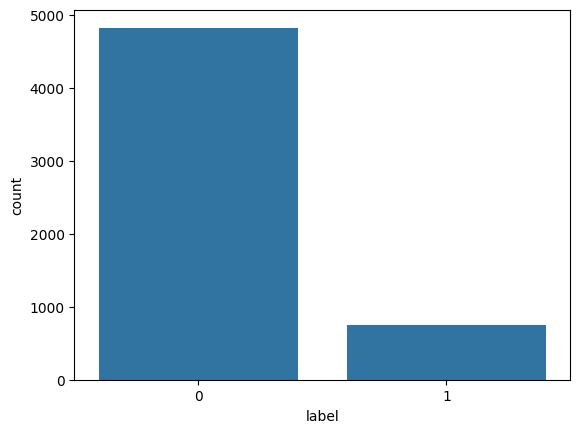

In [24]:
import matplotlib.pyplot as plt

sns.countplot(x='label', data=df)
plt.show()


In [33]:
import re 
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\polur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer


In [40]:
corpus = []
stemmer = SnowballStemmer("english")

In [41]:
df['label'][1]

np.int64(0)

In [42]:
for i in range(len(df)):
    msg = df['text'][i]                      # use your text column
    msg = re.sub('[^a-zA-Z]', ' ', msg)      # keep only letters
    msg = msg.lower()                        
    msg = msg.split()                        

    msg = [stemmer.stem(word) 
           for word in msg 
           if word not in set(stopwords.words('english'))]

    msg = ' '.join(msg)
    corpus.append(msg)

In [45]:
corpus[2]

'free entri wkli comp win fa cup final tkts st may text fa receiv entri question std txt rate c appli'

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(corpus).toarray()
y = df.iloc[: , 0].values

In [49]:
x.shape

(5572, 6216)

In [50]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5572,))

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 0)

In [54]:
x_train.shape
y_train.shape

(4457,)

In [55]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(x_train,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [56]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(1115,))

<Axes: >

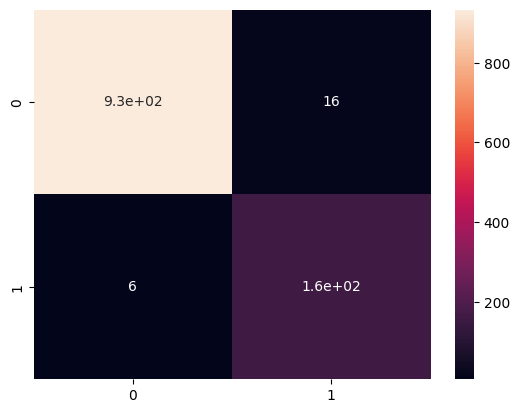

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True)

In [58]:
from sklearn.metrics import precision_score,recall_score
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.9090909090909091
0.963855421686747


In [59]:
txt = "don't hurt someone"
txt = np.array([txt])
txt = cv.transform(txt)
classifier.predict(txt)

array([0])

In [62]:
import pickle

pickle.dump(classifier , open('model.pkl', 'wb'))
pickle.dump(cv, open("vectorizer.pkl", "wb"))
